# Computer Lab 8: Land snow cover (part 2)
Climate Data Analysis, ATS 301, Fall 2018					

As before, we start by specifying that we want plots to be displayed inside the Jupyter Notebook, and load the modules we'll need.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set default figure size
# This is so I don't have to keep specifying figsize later.
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import xarray as xr
import cartopy.crs as ccrs
from scipy import stats
import math

Read in data, exclude ocean points, and points that never have snow.

In [2]:
snow_file='/data/ATS_301/Data/nhsce_v01r01_19661004_20181001.nc'
dsnow = xr.open_dataset(snow_file)
snow = dsnow.snow_cover_extent.where(dsnow.land > 0)
new_snow = snow.where(np.any(snow > 0,axis=0))

The reference for this dataset is:

Robinson, David A., Estilow, Thomas W., and NOAA CDR Program (2012):NOAA Climate Date Record (CDR) of Northern Hemisphere (NH) Snow Cover Extent (SCE), Version 1. NOAA National Climatic Data Center. doi:10.7289/V5N014G9 [accessed 10/19/2018].

Verify that this looks like what we expect:

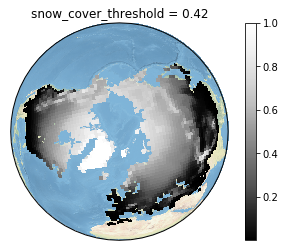

In [3]:
time_average_snow_new=new_snow.mean(dim='time')

ax = plt.axes(projection=ccrs.Orthographic(0, 90))

# This needs to be before the plot function, so that it is at the bottom of the figure.
ax.stock_img()
time_average_snow_new.plot(x='longitude',y='latitude',ax=ax,\
                           transform=ccrs.PlateCarree(),cmap='Greys_r')
plt.show()

## Grid-point statistics

Our goal here is to determine whether two points have the same mean, standard deviation, etc.  

Take a quick look at the time-average plot to identify some particular grid points to explore.

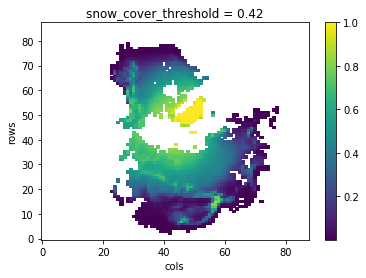

In [4]:
time_average_snow_new.plot()

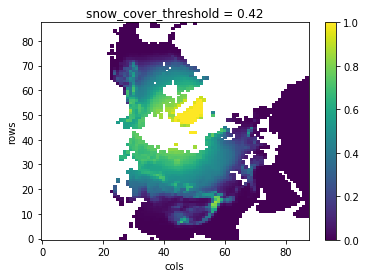

In [5]:
# Compare with the plot with all land points, just to see the effect of omitting
# the snow-free points.
time_average_snow=snow.mean(dim='time')

time_average_snow.plot()

Pick a few points. Choose two near each other, and one further away with a different time average. Points with averages near the middle of the colorbar will work best, since they are will have more variation. 

Calculate the annual mean for this single point.

In [6]:
# Your indexes will differ, based on the first point you picked.
snow_1=snow[:,47,30].groupby('time.year').mean()
print(snow_1)

<xarray.DataArray (year: 53)>
array([0.916667, 0.596154, 0.653061, 0.903226, 0.538462, 0.75    , 0.596154,
       0.641509, 0.596154, 0.634615, 0.634615, 0.653846, 0.557692, 0.528302,
       0.538462, 0.596154, 0.596154, 0.442308, 0.584906, 0.692308, 0.596154,
       0.519231, 0.596154, 0.557692, 0.566038, 0.538462, 0.653846, 0.538462,
       0.538462, 0.557692, 0.566038, 0.538462, 0.557692, 0.576923, 0.634615,
       0.603774, 0.596154, 0.519231, 0.5     , 0.519231, 0.538462, 0.528302,
       0.576923, 0.538462, 0.519231, 0.557692, 0.54717 , 0.557692, 0.519231,
       0.519231, 0.519231, 0.538462, 0.475   ], dtype=float32)
Coordinates:
    snow_cover_threshold  float32 0.42
    latitude              float64 64.88
    longitude             float64 -155.5
  * year                  (year) int64 1966 1967 1968 1969 1970 1971 1972 ...


In [7]:
help(stats.describe)

Help on function describe in module scipy.stats.stats:

describe(a, axis=0, ddof=1, bias=True, nan_policy='propagate')
    Compute several descriptive statistics of the passed array.
    
    Parameters
    ----------
    a : array_like
       Input data.
    axis : int or None, optional
       Axis along which statistics are calculated. Default is 0.
       If None, compute over the whole array `a`.
    ddof : int, optional
        Delta degrees of freedom (only for variance).  Default is 1.
    bias : bool, optional
        If False, then the skewness and kurtosis calculations are corrected for
        statistical bias.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    nobs : int or ndarray of ints
       Number of observations (length of data alon

In [8]:
stats.describe(snow_1)

DescribeResult(nobs=53, minmax=(0.44230768, 0.9166667), mean=0.5822668, variance=0.007274894, skewness=2.214291572570801, kurtosis=6.219567096973657)

Save these values, for later use.

`stats.describe` doesn't include the standard deviation and standard error of the mean, so we use different functions for these.

In [9]:
n1, (min1, max1), m1, v1, s1, k1 = stats.describe(snow_1)

sd1=stats.tstd(snow_1)     # standard deviation
print(sd1)

sem1=stats.sem(snow_1)   # Standard error
print(sem1)

0.08529298983369643
0.01171589286736611


Next, calculate the mean, variance, std dev, and standard error yourself, using only `np.sum`, `np.size`, `math.sqrt`, and math operations. Verify that they match what python gets.

Note, you may have to use the `float` function (e.g., `float(mean1)`) to get your values to print correctly.

In [ ]:
## Now, calculate the mean, variance, and std dev yourself
mean1= XXXXX
var1= XXXXXX
st_dev1= XXXXXX
st_err1=XXXXXXX

In [10]:
# 

mean1=np.sum(snow_1)/np.size(snow_1)
var1=np.sum((snow_1-mean1)**2)/(np.size(snow_1)-1) # unbiased estimate
var1alt=np.sum((snow_1-mean1)**2)/(np.size(snow_1)) # underestimates variance


st_dev1=math.sqrt(var1) # unbiased estimate
st_dev1_alt=math.sqrt(np.sum((snow_1-mean1)**2)/(np.size(snow_1)))  # underestimate stdev

st_err1=st_dev1/math.sqrt(np.size(snow_1))

# Create a table comparing the two

print('           scipy     my calc')
print('Mean:      {0:.3f}     {1:.3f}'.format(m1, float(mean1)))
print('Var:       {0:.4f}    {1:.4f}'.format(v1, float(var1)))
print('Std:       {0:.4f}    {1:.4f}'.format(sd1, st_dev1))
print('SEM:       {0:.3f}     {1:.3f}'.format(sem1, st_err1))

#print('Standard deviation (unbiased) = '+str(float(st_dev1)))
#print('Standard deviation (1/N version) = '+str(float(st_dev1_alt)))

           scipy     my calc
Mean:      0.582     0.582
Var:       0.0073    0.0073
Std:       0.0853    0.0853
SEM:       0.012     0.012


Plot the histogram. You may want to play around with the number of bins it uses.

(array([ 0.63640991,  1.27282111,  5.72768346, 10.18256884,  3.18204637,
         5.72769497,  2.54563709,  1.90923166,  0.63640927,  0.        ,
         0.63640927,  0.        ,  0.        ,  0.        ,  0.        ,
         1.27282111]),
 array([0.44230768, 0.47195512, 0.50160253, 0.53125   , 0.5608974 ,
        0.5905449 , 0.6201923 , 0.64983976, 0.67948717, 0.70913464,
        0.73878205, 0.7684295 , 0.7980769 , 0.8277244 , 0.8573718 ,
        0.8870193 , 0.9166667 ], dtype=float32),
 <a list of 16 Patch objects>)

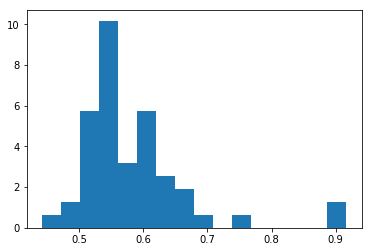

In [11]:
plt.hist(snow_1, density=True,bins='auto')
# bins='auto' or bins=14

Now, what would a normal distribution with this mean and std dev look like?

The `stats.norm.rvs` function samples `size` times from a normal distribution with mean `loc` and standard deviation `scale`. 

DescribeResult(nobs=53, minmax=(0.38800627058975823, 0.7482647418027011), mean=0.5794495648949606, variance=0.006994822414217964, skewness=-0.1819563469483566, kurtosis=-0.6316932322165516)


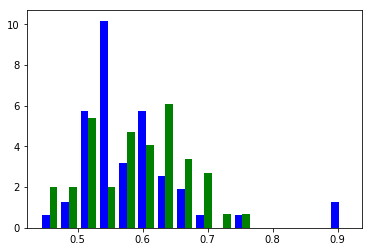

In [17]:
r = stats.norm.rvs(loc=m1,scale=sd1,size=n1)
print(stats.describe(r))

# Plot our data and the sampled normal data. 
plt.hist((snow_1,r), density=True, bins='auto',color=('b','g'))

plt.show()  # used here so that we don't get all the histogram output.

Re-run the above cell a few times. Notice how much the distribution can vary.

This is an indication that the limited number of years we have will increase the uncertainty in our statistics, as we will see soon.

### Do two distributions have the same means? 

Does your grid point data have the same mean as the normal distribution?

They should, since we are specifying the mean value for the distribution. The question is, can we prove it? Or rather, can we disprove that they have the same means?

[Some code is repeated here so it is all in one place.]


           Snow     Normal
Mean:      0.582     0.581
Var:       0.0073    0.0065
Std:       0.085     0.081
SEM:       0.012     0.011
Skew:      2.21      0.11
Kurt:      6.22      -0.55


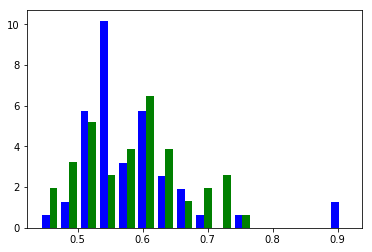

In [21]:
# Calculate the annual averages for each year for this single point.
snow_1=snow[:,47,30].groupby('time.year').mean()

# Statistics for this point.
n1, (min1, max1), m1, v1, s1, k1 = stats.describe(snow_1)
sd1=stats.tstd(snow_1)   # standard deviation (unbiased)
sem1=stats.sem(snow_1)   # Standard error

# Samples from a normal distribution using same mean and std dev
r = stats.norm.rvs(loc=m1,scale=sd1,size=n1)

norm_n, (norm_min, norm_max), norm_m, norm_v, norm_s, norm_k = stats.describe(r)
norm_std=stats.tstd(r)
norm_sem=stats.sem(r)

# Create a table comparing the two

print('           Snow     Normal')
print('Mean:      {0:.3f}     {1:.3f}'.format(m1, norm_m))
print('Var:       {0:.4f}    {1:.4f}'.format(v1, norm_v))
print('Std:       {0:.3f}     {1:.3f}'.format(sd1, norm_std))
print('SEM:       {0:.3f}     {1:.3f}'.format(sem1, norm_sem))

print('Skew:      {0:.2f}      {1:.2f}'.format(s1, norm_s))
print('Kurt:      {0:.2f}      {1:.2f}'.format(k1, norm_k))


# Plot our data and the sampled normal data. 
plt.hist((snow_1,r), density=True, bins='auto',color=('b','g'))
plt.show()  # used here so that we don't get all the histogram output.

In [ ]:
#
#### Verify that this is using correct form of std dev.  Doesn't really matter, tho.
r = stats.norm.rvs(loc=m1,scale=sd1,size=n1)
#r = stats.norm.rvs(loc=m1,scale=sd1,size=1000)

#r = stats.norm.rvs(loc=m1,scale=std_dev_alt,size=1000)

The **means** and **standard** errors give us an idea of the significance of the difference of the means. More formally, we can do statistical tests to check this.

Here, we're just adding a t-test to the previous code cell.

           Snow     Normal
Mean:      0.582     0.572
Var:       0.0073    0.0045
Std:       0.085     0.067
SEM:       0.012     0.009
Skew:      2.21      0.29
Kurt:      6.22      -0.55


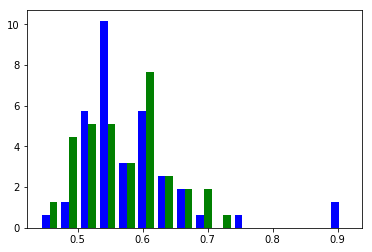


Ttest_indResult(statistic=0.7122869706038488, pvalue=0.4779691960545056)


In [24]:
# Calculate the annual averages for each year for this single point.
snow_1=snow[:,47,30].groupby('time.year').mean()

# Statistics for this point.
n1, (min1, max1), m1, v1, s1, k1 = stats.describe(snow_1)
sd1=stats.tstd(snow_1)   # standard deviation (unbiased)
sem1=stats.sem(snow_1)   # Standard error

# Samples from a normal distribution using same mean and std dev
r = stats.norm.rvs(loc=m1,scale=sd1,size=n1)

norm_n, (norm_min, norm_max), norm_m, norm_v, norm_s, norm_k = stats.describe(r)
norm_std=stats.tstd(r)
norm_sem=stats.sem(r)

# Create a table comparing the two

print('           Snow     Normal')
print('Mean:      {0:.3f}     {1:.3f}'.format(m1, norm_m))
print('Var:       {0:.4f}    {1:.4f}'.format(v1, norm_v))
print('Std:       {0:.3f}     {1:.3f}'.format(sd1, norm_std))
print('SEM:       {0:.3f}     {1:.3f}'.format(sem1, norm_sem))

print('Skew:      {0:.2f}      {1:.2f}'.format(s1, norm_s))
print('Kurt:      {0:.2f}      {1:.2f}'.format(k1, norm_k))


# Plot our data and the sampled normal data. 
plt.hist((snow_1,r), density=True, bins='auto',color=('b','g'))
plt.show()  # used here so that we don't get all the histogram output.

# Student's t-test

print()
print(stats.ttest_ind(snow_1,r,equal_var=False))

Small p-values indicate that the difference in means is unlikely to be larger than what we obtained here due just to chance. 

Large p-values indicate that it's not unlikely you'd get the same difference in sample means from the same distribution by change.

Based on the p-values, we cannot reject the null hypothesis that the mean are consistent. 

### Repeating the comparison using a different sample of the normal distribution

Try running the above cell again.  Do the statistics and results of the Student's t-test change?  Does the p-value ever indicate a statistically significant (at the 0.05 level) difference?  Should it?

For your homework, you will re-sample from the normal distribution a number of times (~20). Record the t-statistics and p-values. It's easiest to do this using a **for loop** (see below).  However, you can also repeat the calculation manually, recording the p values and t statistics each time.  Put the t-statistics and p-values into a table.

array([-2.3627392 , -2.3150071 , -2.26727499, -2.21954289, -2.17181078,
       -2.12407868, -2.07634657, -2.02861447, -1.98088236, -1.93315026,
       -1.88541815, -1.83768604, -1.78995394, -1.74222183, -1.69448973,
       -1.64675762, -1.59902552, -1.55129341, -1.50356131, -1.4558292 ,
       -1.4080971 , -1.36036499, -1.31263289, -1.26490078, -1.21716868,
       -1.16943657, -1.12170447, -1.07397236, -1.02624026, -0.97850815,
       -0.93077605, -0.88304394, -0.83531184, -0.78757973, -0.73984763,
       -0.69211552, -0.64438342, -0.59665131, -0.54891921, -0.5011871 ,
       -0.453455  , -0.40572289, -0.35799079, -0.31025868, -0.26252658,
       -0.21479447, -0.16706237, -0.11933026, -0.07159816, -0.02386605,
        0.02386605,  0.07159816,  0.11933026,  0.16706237,  0.21479447,
        0.26252658,  0.31025868,  0.35799079,  0.40572289,  0.453455  ,
        0.5011871 ,  0.54891921,  0.59665131,  0.64438342,  0.69211552,
        0.73984763,  0.78757973,  0.83531184,  0.88304394,  0.93

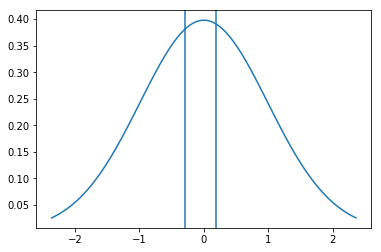

In [27]:
df = n1+n1-2
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)
plt.plot(x, stats.t.pdf(x, df))

# For your homework, you can either use a for loop to generate these values 20 times, 
# or run the previous cell 20 times and record the t-statistics and p values.

# Copy this line 20 times and replace with the t-statistics for your data.
plt.axvline(x=-0.3)
plt.axvline(x=0.19541631165695444)
np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)

### Comparing two normal distributions

The data we have is probably not really a normal distribution. What happens if we compare one random normal distribution to another?

By comparing two sets of normal distributions samples (which we know for sure either are or are not sampled from the same normal distribution population), we can get a feel for how well we can expect the student's t-test to work.

DescribeResult(nobs=53, minmax=(0.43423275921417054, 0.7805865101571745), mean=0.5949979214991977, variance=0.005651611116544226, skewness=0.31245321361029066, kurtosis=-0.4272315354857721)
DescribeResult(nobs=53, minmax=(0.369145547261273, 0.7565109727819886), mean=0.5652123404627505, variance=0.006021931163619743, skewness=0.012368202960704263, kurtosis=0.039168835905673216)
Ttest_indResult(statistic=2.006978319064296, pvalue=0.04734937251552185)


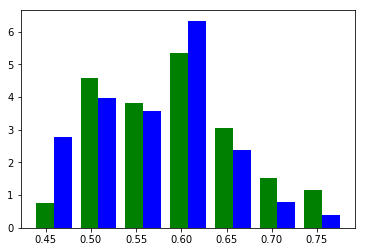

In [29]:
# Create two samples from normal distributions and see how well they compare to each other.

r1 = stats.norm.rvs(loc=m1,scale=sd1,size=n1)
r2 = stats.norm.rvs(loc=m1,scale=sd1,size=n1)

print(stats.describe(r1))
print(stats.describe(r2))

print(stats.ttest_ind(r1,r2,equal_var=False))

plt.hist((r1,r2), density=True, bins='auto', color=('g','b'))
plt.show()

Repeat the above. With what sort of frequency do you get a result that is "statistically significant"?

Now, increase the _number_ of values in each sample (and re-run the above cell). What happens?

DescribeResult(nobs=100, minmax=(0.38898977448894856, 0.7870246659603517), mean=0.5871699841521194, variance=0.007962108287005167, skewness=-0.07948360853799541, kurtosis=-0.6830252503816294)
DescribeResult(nobs=100, minmax=(0.34214649142991016, 0.8262307335512145), mean=0.5686094087364163, variance=0.008763284079232584, skewness=0.11134543881079711, kurtosis=-0.13536829530854)
Ttest_indResult(statistic=1.4351697725053043, pvalue=0.1528200797829438)


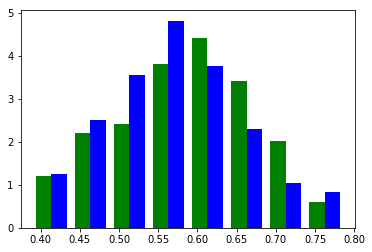

In [30]:
# Create two larger samples from normal distributions and see how well they compare to each other.

n_new=100

r1 = stats.norm.rvs(loc=m1,scale=sd1,size=n_new)
r2 = stats.norm.rvs(loc=m1,scale=sd1,size=n_new)

print(stats.describe(r1))
print(stats.describe(r2))

print(stats.ttest_ind(r1,r2,equal_var=False))

plt.hist((r1,r2), density=True, bins='auto', color=('g','b'))
plt.show()

Finally, create two _different_ normal distributions and see how well they compare to each other.

DescribeResult(nobs=53, minmax=(0.484205794746173, 0.8323421513147277), mean=0.6282793204734397, variance=0.0057714121900925746, skewness=0.2867234339873117, kurtosis=-0.3468781646604491)
DescribeResult(nobs=53, minmax=(0.37814366062374993, 0.7242844711992772), mean=0.5725078003263844, variance=0.006467777855303516, skewness=-0.18125104735687667, kurtosis=-0.40915022243850485)
Ttest_indResult(statistic=3.670067718053078, pvalue=0.0003851001765044975)


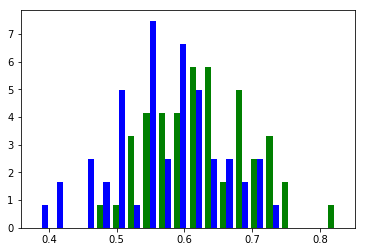

In [34]:
# Create two _different_ normal distributions and see how well they compare to each other.

r1 = stats.norm.rvs(loc=m1+sd1/2,scale=sd1,size=n1)
r2 = stats.norm.rvs(loc=m1,scale=sd1,size=n1)


print(stats.describe(r1))
print(stats.describe(r2))

print(stats.ttest_ind(r1,r2,equal_var=False))

plt.hist((r1,r2), density=True, bins=20, color=('g','b'))
plt.show()

Even though we know they are different, the test doesn't always come back "significant." Increase the number of data points (i.e. "years") until you usually get a "significant" result.

## Compare annual means from two grid points

Finally, we are ready to compare snow data at different points.

           Snow 1    Snow 2
Mean:      0.582     0.624
Var:       0.0073    0.0054
Std:       0.085     0.074
SEM:       0.012     0.010
Skew:      2.21      1.94
Kurt:      6.22      5.10

Ttest_indResult(statistic=-2.6960767621956263, pvalue=0.008210809972444558)
Ttest_relResult(statistic=-8.59925403142312, pvalue=1.456073263639001e-11)


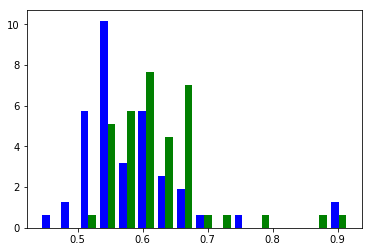

In [35]:
# Use your own point here.

snow_2=snow[:,47,31].groupby('time.year').mean()

n2, (min2, max2), m2, v2, s2, k2 = stats.describe(snow_2)
sd2=stats.tstd(snow_2)   # standard deviation (unbiased)
sem2=stats.sem(snow_2)   # Standard error

# Create a table comparing the two

print('           Snow 1    Snow 2')
print('Mean:      {0:.3f}     {1:.3f}'.format(m1, m2))
print('Var:       {0:.4f}    {1:.4f}'.format(v1, v2))
print('Std:       {0:.3f}     {1:.3f}'.format(sd1, sd2))
print('SEM:       {0:.3f}     {1:.3f}'.format(sem1, sem2))
print('Skew:      {0:.2f}      {1:.2f}'.format(s1, s2))
print('Kurt:      {0:.2f}      {1:.2f}'.format(k1, k2))


# Student's t-test

print()
print(stats.ttest_ind(snow_1,snow_2,equal_var=False))
print(stats.ttest_rel(snow_1,snow_2))

plt.hist((snow_1,snow_2), density=True, bins='auto', color=('b', 'g'))
plt.show()

For my two points, I can reject the null hypothesis that these point have the same statistics. (You may get a different result, depending on the points you choose.)

           Snow 1    Snow 3
Mean:      0.582     0.624
Var:       0.0073    0.0070
Std:       0.085     0.084
SEM:       0.012     0.011
Skew:      2.21      2.39
Kurt:      6.22      7.39

Ttest_indResult(statistic=-2.5675295717512383, pvalue=0.011664806905353204)
Ttest_relResult(statistic=-9.318694244914283, pvalue=1.1218126740588645e-12)


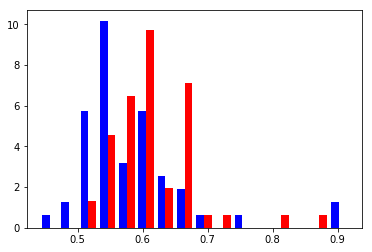

In [36]:
# Pick another point and compare to the first.

snow_3=snow[:,46,30].groupby('time.year').mean()

n3, (min3, max3), m3, v3, s3, k3 = stats.describe(snow_3)
sd3=stats.tstd(snow_3)   # standard deviation (unbiased)
sem3=stats.sem(snow_3)   # Standard error

# Create a table comparing the two

print('           Snow 1    Snow 3')
print('Mean:      {0:.3f}     {1:.3f}'.format(m1, m3))
print('Var:       {0:.4f}    {1:.4f}'.format(v1, v3))
print('Std:       {0:.3f}     {1:.3f}'.format(sd1, sd3))
print('SEM:       {0:.3f}     {1:.3f}'.format(sem1, sem3))
print('Skew:      {0:.2f}      {1:.2f}'.format(s1, s3))
print('Kurt:      {0:.2f}      {1:.2f}'.format(k1, k3))

# Student's t-test

print()
print(stats.ttest_ind(snow_1,snow_3,equal_var=False))
print(stats.ttest_rel(snow_1,snow_3))

plt.hist((snow_1,snow_3), density=True, bins='auto',color=('b', 'r'))
plt.show()


For these two points, I can reject the null hypothesis that these point have the same statistics. (You may get a different result, depending on the points you choose.)

Ttest_indResult(statistic=-0.025273790313768595, pvalue=0.9798857797949518)
Ttest_relResult(statistic=0.09086718511330878, pvalue=0.9279472538892796)


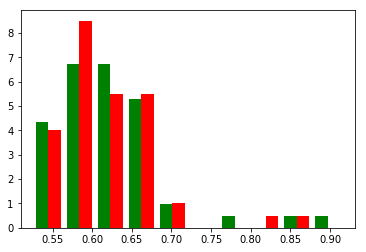

In [37]:
# Test points 2 and 3
print(stats.ttest_ind(snow_2,snow_3,equal_var=False))
print(stats.ttest_rel(snow_3,snow_2))

plt.hist((snow_2,snow_3), density=True, bins='auto',color=('g', 'r'))
plt.show()

The difference in these two means is not statistically significant according to either test. We _cannot_ reject the null hypothesis.

Create a nice table summarizing these three points.

In [38]:
# Determine the location for each point

lat1=float(dsnow.latitude[47,30])
lat2=float(dsnow.latitude[47,31])
lat3=float(dsnow.latitude[46,30])

lon1=float(dsnow.longitude[47,30])
lon2=float(dsnow.longitude[47,31])
lon3=float(dsnow.longitude[46,30])

In [39]:
# Put everything in a big table.

print('Annual average snow cover (fraction) statistics for specific points')
print('-------------------------------------------------------------------')
print('           Pt 1      Pt 2      Pt 3  ')
print('Mean:      {0:.3f}     {1:.3f}     {2:.3f}     '.format(m1, m2, m3))
print('Var:       {0:.3f}     {1:.3f}     {2:.3f}     '.format(v1, v2, v3))
print('Std Dev:   {0:.3f}     {1:.3f}     {2:.3f}     '.format(sd1, sd2, sd3))
print('Std err    {0:.3f}     {1:.3f}     {2:.3f}     '.format(sem1, sem2, sem3))
#print('Skew:      {0:.2f}     {1:.2f}     {2:.2f}     '.format(s1, s2, s3))
#print('Kurt:      {0:.2f}     {1:.2f}     {2:.2f}     '.format(k1, k2, k3))
print('Lat:       {0:.1f}      {1:.1f}      {2:.1f}     '.format(lat1, lat2, lat3))
print('Lon:       {0:.0f}      {1:.0f}      {2:.0f}       '.format(lon1, lon2, lon3))


Annual average snow cover (fraction) statistics for specific points
-------------------------------------------------------------------
           Pt 1      Pt 2      Pt 3  
Mean:      0.582     0.624     0.624     
Var:       0.007     0.005     0.007     
Std Dev:   0.085     0.074     0.084     
Std err    0.012     0.010     0.011     
Lat:       64.9      66.6      65.3     
Lon:       -155      -154      -160       


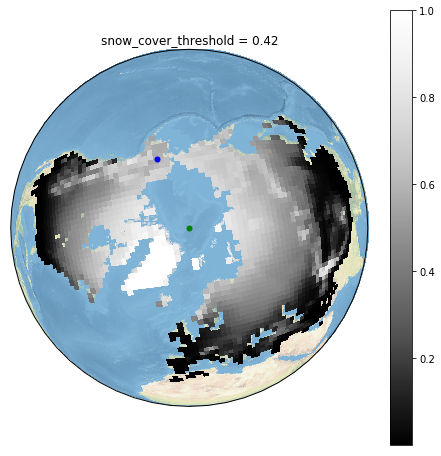

In [41]:
# Indicate the three points you used on a plot. This example has 2, add another.

plt.figure(figsize=[8,8])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.stock_img()
time_average_snow_new.plot.pcolormesh(x='longitude',y='latitude'\
                                      ,ax=ax,transform=ccrs.PlateCarree(),cmap='Greys_r')

# Within the plt.plot command, indicate the longitude, then latitude
plt.plot(-155,64.9,'b.',transform=ccrs.PlateCarree(),markersize=10)

# The North Pole. No land there!
plt.plot(0,90,'g.',transform=ccrs.PlateCarree(),markersize=10)

plt.show()

## Using Loops (AKA Making the computer do all the work)




Ok, we've calculated the t-statistics and p-values for a few sample distributions.  But we'd like to do 20-50.  

Here's where a __loop__ is useful. One thing that computers are great at is repeating actions.  We can repeat commands over and over (and over) by placing the commands we want to repeat inside a __for loop__. Here's an example that prints "Hello World" 10 times:

```
for i in range(10):
    print("Hello, World")
    
```

<span style="color:red">The __indentation__ (the spaces in front of the `print` command) is very important here.</span> This is how the command interpreter knows which commands are within the loop! 

The variable `i` is an __index__. `range(10)` is a simple way of creating a __list__ of 10 values, from 0 to 9 (i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, 9). Remember that <span style="color:red">Python uses an index of 0 for the first value in a list</span>. If you are used to languages that start with a 1, this behavior will probably cause some bugs in your code at some point, so be aware of the different indexing conventions.

The __`for` loop__ runs the code inside the loop once for every value in the list. Within the loop, the variable `i` has whatever the current value from the list is. That is, the first time the body of the loop is evaluated, `i` has a value of 0. The second time `i` is 1. `for i in range(10)` is just a way of saying we will evaluate the statements within the loop 10 times. 

Try this simple loop.  To see how the index (`i`) changes, we'll output during every __iteration__ of the loop.  *Notice that the two indented lines are repeated, while the last command is not*.  

In [ ]:
print('before loop')
for i in range(10):
    print("Hello, World")
    print('The current value of i is ',i)
print('after loop')    

<span style="color:red">As you wrote this code, you may have noticed that Jupyter Notebook automatically indents forward, but you have to manually delete spaces when you return to the previous indentation level.</span> 

You don't have to stick to indicies of 0, 1, 2, etc.  You can also use any list (such as a list of solar constants) to loop over.  The commands within the for loop will be repeated once for every index in the list.

<span style="color:red">Note: do not change the value of your index (i.e., `i` above) within the loop.  Bad stuff will happen!</span>

In [42]:
print('before loop')
for solar_constant in np.linspace(300,400,11):
    print("Hello, Earth")
    print('The current value of the solar constant is ',solar_constant)
print('after loop')    

before loop
Hello, Earth
The current value of the solar constant is  300.0
Hello, Earth
The current value of the solar constant is  310.0
Hello, Earth
The current value of the solar constant is  320.0
Hello, Earth
The current value of the solar constant is  330.0
Hello, Earth
The current value of the solar constant is  340.0
Hello, Earth
The current value of the solar constant is  350.0
Hello, Earth
The current value of the solar constant is  360.0
Hello, Earth
The current value of the solar constant is  370.0
Hello, Earth
The current value of the solar constant is  380.0
Hello, Earth
The current value of the solar constant is  390.0
Hello, Earth
The current value of the solar constant is  400.0
after loop


So, rather than running the following cell multiple times, being sure to record the values:

In [43]:
# Calculate the annual averages for each year for this single point.
snow_1=snow[:,47,30].groupby('time.year').mean()

# Statistics for this point.
n1, (min1, max1), m1, v1, s1, k1 = stats.describe(snow_1)
sd1=stats.tstd(snow_1)   # standard deviation (unbiased)

# Samples from a normal distribution using same mean and std dev
r = stats.norm.rvs(loc=m1,scale=sd1,size=n1)

# Student's t-test
print(stats.ttest_ind(snow_1,r,equal_var=False))

Ttest_indResult(statistic=-0.543003705325622, pvalue=0.5882910137327639)


and then using those values to make a plot:

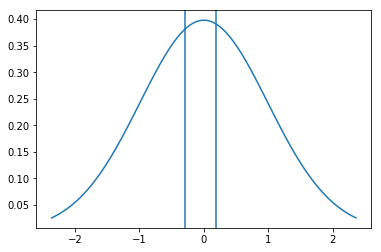

In [44]:
df = n1+n1-2
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)
plt.plot(x, stats.t.pdf(x, df))

# For your homework, you can either use a for loop to generate these values 20 times, 
# or run the previous cell 20 times and record the t-statistics and p values.

# Copy this line 20 times and replace with the t-statistics for your data.
plt.axvline(x=-0.3)
plt.axvline(x=0.19541631165695444)


We can do this all in one cell:

Ttest_indResult(statistic=-0.015456654614908619, pvalue=0.9876980105086641)
Ttest_indResult(statistic=0.893348780998624, pvalue=0.37385403980857423)
Ttest_indResult(statistic=0.32633852939180985, pvalue=0.7448247206498997)
Ttest_indResult(statistic=0.5307906918697136, pvalue=0.5966955072568694)
Ttest_indResult(statistic=0.5843517475071555, pvalue=0.5602537527394282)
Ttest_indResult(statistic=-0.820437610978737, pvalue=0.41386658083734695)
Ttest_indResult(statistic=-0.6083547020467496, pvalue=0.5442918842691148)
Ttest_indResult(statistic=0.8787869205288862, pvalue=0.3815451611370866)
Ttest_indResult(statistic=-0.04374459581260316, pvalue=0.9651925806667634)
Ttest_indResult(statistic=0.6261773028441657, pvalue=0.5325716934820541)
Ttest_indResult(statistic=0.4730239010190842, pvalue=0.6371875209754615)
Ttest_indResult(statistic=1.1362975424810182, pvalue=0.2584764295868327)
Ttest_indResult(statistic=-0.38708858503132887, pvalue=0.6994825044012324)
Ttest_indResult(statistic=0.9518020357327

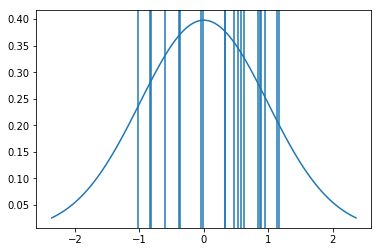

In [47]:
df = n1+n1-2
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)
plt.plot(x, stats.t.pdf(x, df))

for i in range(20):
    r = stats.norm.rvs(loc=m1,scale=sd1,size=n1)
    print(stats.ttest_ind(snow_1,r,equal_var=False))
    t_stat, p_val=stats.ttest_ind(snow_1,r,equal_var=False)
    plt.axvline(x=t_stat)